# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
* 1. Problem definition
* 2. Data
* 3. Evaluation
* 4. Features
* 5. Modelling
* 6. Experimentation

## 1. Problem definition
In a statement, 
> Given clinical parameters about a patient, can we predict whether a person has heart disease or not?

## 2. Data
https://archive.ics.uci.edu/ml/datasets/heart+disease
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data.

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

* pandas
* Matplotlib
* NumPy

for data analysis and manipulation

In [2]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows. columns)

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you are working with.
* 1. What question(s) are your trying to solve?
* 2. What kind of data do we have and how do we treat different types?
* 3. What is missing from the data and how do you deal with it?
* 4. Where are the outliers((wrong)samples that are far away from others) and why should you care about them?
* 5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Find out how many of each class ther are - 1= has heart disease, 0=no heart disease
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

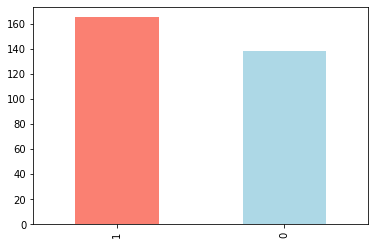

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

This dataset has a good balance in the classes - 1 and 0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
# (1 = male; 0 = female)
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:>

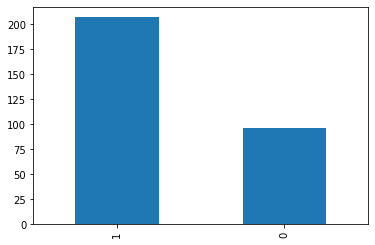

In [12]:
df.sex.value_counts().plot(kind="bar")

In [13]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


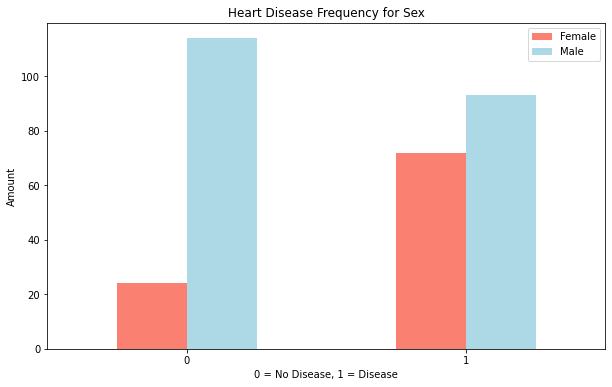

In [14]:
# Create plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10, 6), 
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

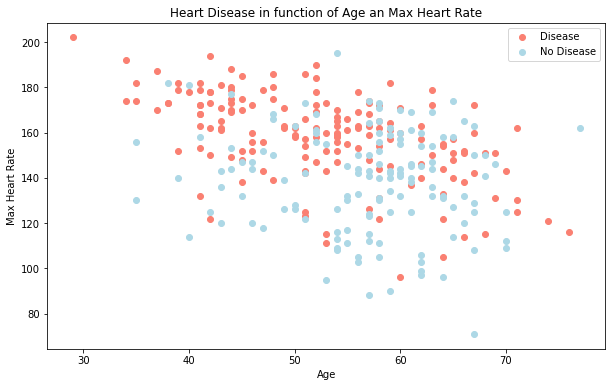

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age an Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

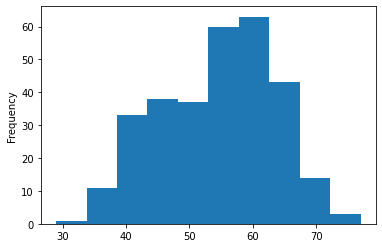

In [16]:
# Check distribution on the age column with a histogram
df.age.plot.hist(); # Has normal distribution

### Heart Disease Frequency per Chest Pain Type
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


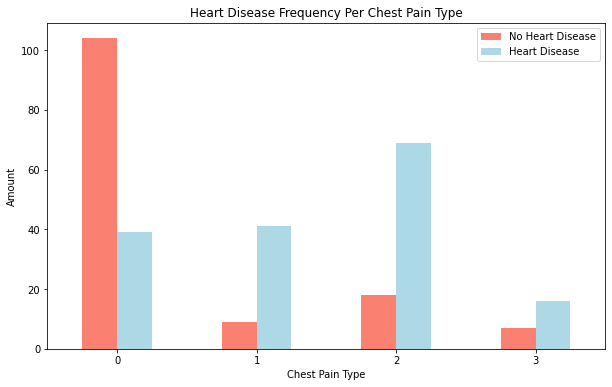

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Correlation Matrix
* Positive Correlation
    * A higher positive value means a potential positive correlation
    * Ex.: As "cp" goes up, the target value also increases
    * Check plot above of cp. The higher cp goes, the more the target increases. Meaning the higher the cp value is, the higher the target value is - more disease in cp=3. See ratio of disease and no disease in plot above where cp=3.
* Negative Correlation
    * A higher negative value means a potential negative correlation
    * A relationship between two variables in which one variable increases as the other decreases
    * Ex.: If exang=1 (chest pain during exercises), their chance of having heart disease goes down (target=0)

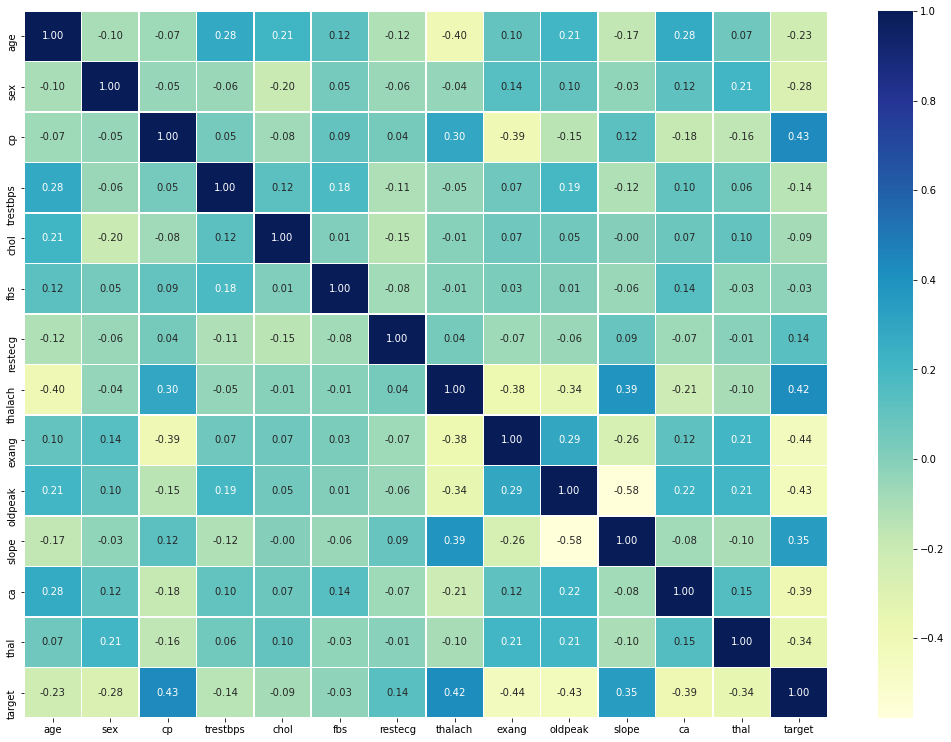

In [20]:
# Make correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 13))
ax = sns.heatmap(corr_matrix,
                    annot=True,
                    linewidth=0.5,
                    fmt=".2f",
                    cmap="YlGnBu")

# 5. Modelling
* Use independent variables (features) to predict dependet variables (lables)

In [21]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [22]:
#Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Build machine learning model to find patterns in training sets and test (use the patterns) on the test set.

Trying three different models:
* Logistic Regression (Despite its name, it is a linear model for classification rather than regression)
* K-Nearest Neighbors Classifier
* Random Forest Classifier

In [23]:
# Put models in a dict
models = {"Logistic Regression": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
            "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scitkit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels 
    """

    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<AxesSubplot:>

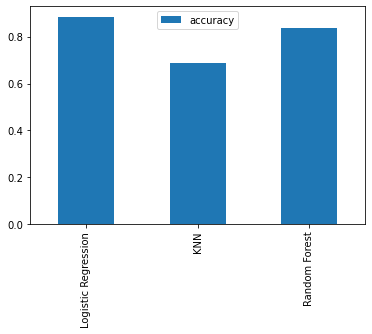

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

### Got baseline model now. Next steps:
* Hyperparamater tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall 
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand):

In [26]:
# Tune KNN
train_scores = []
test_scores = []

# Create list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [27]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on test data: 75.41%


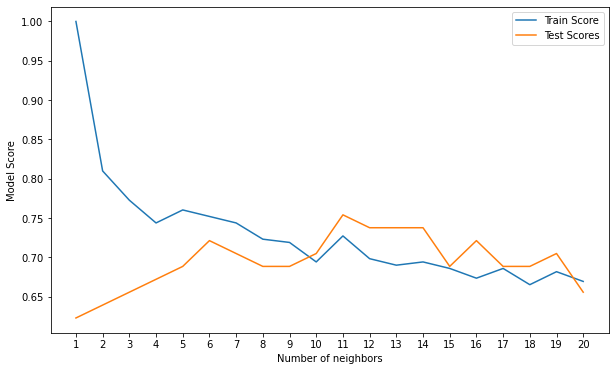

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV
Tune:
* Logistic Regression
* Random Forest Classifier 

using RandomizedSearchCV  (CV = cross validation)

In [29]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [30]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [31]:
# Tune LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=2)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Same score before tuning in LogisticRegression

In [34]:
# Tune RandomForestClassifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=2)
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=Non

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [35]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_rf.score(X_test, y_test)

0.8688524590163934

+~3% better than before tuning in RandomForestClassifier

In [37]:
# Scores before tuning
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameter tuning with GridSearchCV
Tune:
* Logistic Regression
* Random Forest Classifier 

using GridSearchCV  (CV = cross validation)

Since the LogisiticRegression model provides the best scores so far, improve them again using GridSearchCV 

### Logistic Regression 

In [40]:
# Different hyperparameters for LogisiticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameter grid search for LogisiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                            param_grid=log_reg_grid,
                            cv=5,
                            verbose=2)

# Fit the hyperparameter search model
gs_log_reg.fit(X_train, y_train)

olver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, solver=liblinear .......................
[CV] ........ C=0.0003562247890262444, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, solver=liblinear .......................
[CV] ........ C=0.0003562247890262444, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, solver=liblinear .......................
[CV] ........ C=0.0003562247890262444, solver=liblinear, total=   0.0s
[CV] C=0.0003562247890262444, solver=liblinear .......................
[CV] ........ C=0.0003562247890262444, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=liblinear, total=   0.0s
[CV] C=0.0006723357536499335, solver=liblinear .......................
[CV] ........ C=0.0006723357536499335, solver=

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Random Forest Classifier

Best params from RandomizedSearch

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

Same result in Logistic Regression with GridSearchCV as well after all tuning. Same as baseline model

In [47]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 300, 50),
    "max_depth": [3, 5],
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(1, 10, 2)
}

# Setup grid hyperparameter grid search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid,
                    cv=5,
                    verbose=2)

gs_rf.fit(X_train, y_train)

s_leaf=9, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=60, total=   0.1s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=60 
[CV]  max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=60, total=   0.1s
[CV] max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=60 
[CV]  max_depth=5, min_samp

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260])},
             verbose=2)

In [48]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 60}

In [49]:
gs_rf.score(X_test, y_test)

0.8688524590163934

+~3% better than than baseline model but same as with RandomizedSearchCV

In [50]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

and it would be great if cross-validation was ised where possible.

To make comparisons and evaluate trained model, first make predictions.

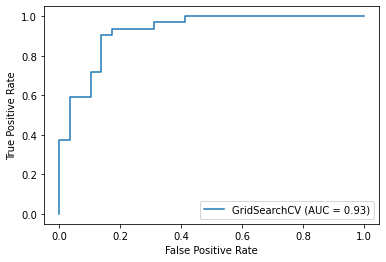

In [51]:
# Make predictions with Logisitc Regression tuned model and plot ROC curve
log_reg_y_preds = gs_log_reg.predict(X_test)
plot_roc_curve(gs_log_reg, X_test, y_test)

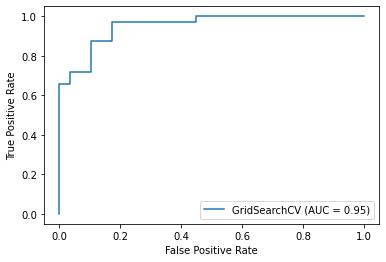

In [52]:
# Make predictions with RandomForestClassifier tuned model and plot ROC curve
rf_y_preds = gs_rf.predict(X_test)
plot_roc_curve(gs_rf, X_test, y_test)

In [53]:
# Confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """ 
    Plots confusion matrix Seaborn's heatmap
    """

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)

    plt.xlabel("True label")
    plt.ylabel("Predicted Label")

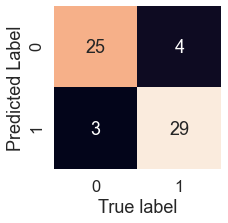

In [54]:
# Logistic Regression 
plot_conf_mat(y_test, log_reg_y_preds)

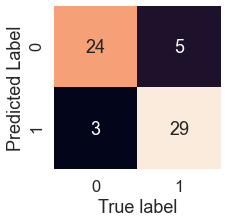

In [55]:
# Random Forest Classifier
plot_conf_mat(y_test, rf_y_preds)

Both models predict the same positives. Logistic Regression is better in predicting negatives. Predicts 25 true negatives and 4 false negatives. Random Forest Classifier predicts 24 true negatives and 5 false negatives.

#### So far Logistic Regression is working better, also taking scores into account. ROC Curve of RandomForestClassifier seems to be better?!

### Classification Report, Cross Validated precision, recall and f1-score.
* `Precision` – What percent of your predictions were correct?
    * Accuracy of positive predictions.
    * Ability of a classifier not to label an instance positive that is actually negative.
    * No false positives score = 1.0
* `Recall` – What percent of the positive cases did you catch? 
    * Recall: Fraction of positives that were correctly identified.
    * Ability of a classifier to find all positive instances.
    * No false negatives score = 1.0
* `F1 score` – What percent of positive predictions were correct? 
    * The F1 score is a weighted harmonic mean of precision and recall.
* `Support` - Number of samples each metric was calculated on.
* `Macro Average` - Average score between classes. Does not take class imbalance into account.
* `Weighted Average` - Each metric calculated with respect to how many samples there are in each class.
    * Will be a high value when one class outperforms the other due to having more samples. Class with more samples will be given a higher weight.


In [56]:
# Logistic Regression
print(classification_report(y_test, log_reg_y_preds))

precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [57]:
# RandomForestClassifier
print(classification_report(y_test, rf_y_preds))

precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Calculate evaluation metrics using cross-validation

Calculate precision, recall, f1-score of model using cross-validation and to so use: `cross_val_score()`. Above classification reports are calculated without cross validation, meaning only on one data split. 

#### Logistic Regression

In [63]:
# Function for cross-validation
def cross_val(model, X, y, scoring_list):
    """
    Function to get classification model scorings
    """

    scoring_dict = {}

    for scoring in scoring_list:
        score = cross_val_score(model, X, y, cv=5, scoring=scoring)
        scoring_dict[scoring] = np.mean(score)
    return scoring_dict

In [64]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [65]:
# Create a new classifier with best params
clf_log_reg = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [67]:
# Logistic Regression cross-validated Scoring
scorings = ["accuracy", "precision", "recall", "f1"]
log_reg_cv_scorings = cross_val(clf_log_reg, X, y, scorings) 
log_reg_cv_scorings

{'accuracy': 0.8479781420765027,
 'precision': 0.8215873015873015,
 'recall': 0.9272727272727274,
 'f1': 0.8705403543192143}

In [68]:
# Random Forest Classifier cross-validated Scoring
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 60}

In [71]:
clf_rf = RandomForestClassifier(max_depth=5,
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=60)
rf_cv_scoring = cross_val(clf_rf, X, y, scorings)
rf_cv_scoring

{'accuracy': 0.8414754098360657,
 'precision': 0.8307816355254687,
 'recall': 0.8727272727272727,
 'f1': 0.8544253064903291}

### Visualize cross-validated metrics

In [76]:
def make_plot_cv_metrics(scoring_dict, title_type):
    df = pd.DataFrame(scoring_dict, index=[0])
    df.T.plot.bar(title=f"Cross-validated classifiation metrics - {title_type}", legend=False);

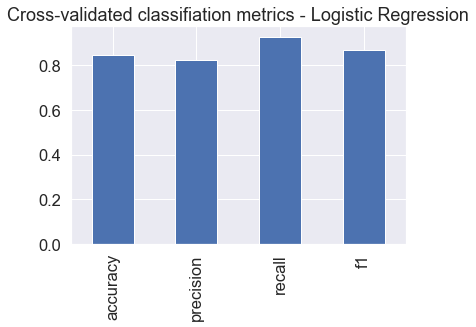

In [77]:
make_plot_cv_metrics(log_reg_cv_scorings, "Logistic Regression")

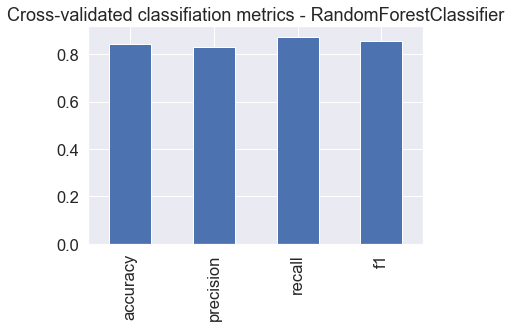

In [78]:
make_plot_cv_metrics(rf_cv_scoring, "RandomForestClassifier")

## Feature Importance
Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(model name) feature importance" in google etc.

### Model-driven exploratory data analysis

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Logistic Regression model - Feature's coefs 

In [83]:
# Fit an instance of Logistic Regression with best params from above
clf_log_reg.fit(X_train, y_train);

Check coef_. Shows how each independent variable (feature) contributes to predict the dependent variable (labels, target)

In [82]:
clf_log_reg.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [85]:
# Match coef's of features to columns
log_reg_feature_dict = dict(zip(df.columns, list(clf_log_reg.coef_[0])))
log_reg_feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

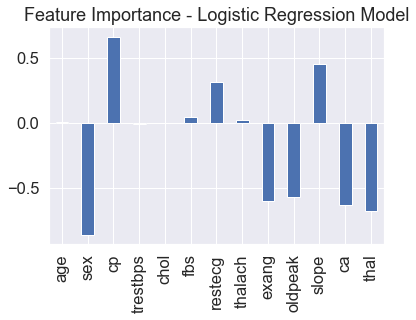

In [90]:
# Visualize feature importance
log_reg_feature_dict = pd.DataFrame(log_reg_feature_dict, index=[0])
log_reg_feature_dict.T.plot.bar(title="Feature Importance - Logistic Regression Model", legend=False);

In [91]:
# Negative coef
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In the plots above from this dataset one can see that more women (=0) have heart disease. In the cell above a negative coefficient can be seen for sex. Also visible on the correlation heatmap. Value for women = 0 (goes down) and value for heart disease =1 (goes up). = Negative coefficient.

In [93]:
# Positive coef
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


As slope increases, the target value increases. (More likely heart disease). Its a positive coefficient. This can also be seen on the heatmap above - positive correlation.
slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

#### The difference here to the heatmap of correlation is, that here model-driven exploratory data analysis comes into play. These coefficients are based on the models calculations how it predicts if heart disease or not. As can be seen, it is similar to the correlation heatmap which is based on the pure data, not the models calculations.

### Random Forest Classification model - Feature's coefs 
RandomForestClassifier has no `coef` because it is not a linear model. Scikit-Learn provides `feature_importances` attribute instead. Values um up to 1. The higher the value, the more imporant it is for the model's calculatioin.

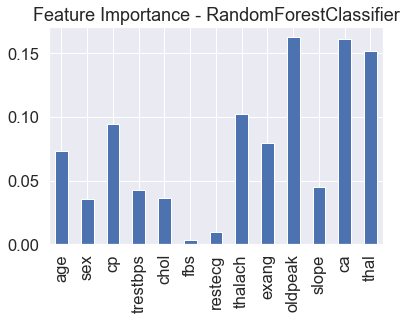

In [103]:
clf_rf.fit(X_train, y_train)
rf_feature_dict = dict(zip(df.columns, clf_rf.feature_importances_))
rf_feature_df = pd.DataFrame(rf_feature_dict, index=[0])
rf_feature_df.T.plot.bar(title="Feature Importance - RandomForestClassifier", legend=False);

## Reporting / Results

If evaluation metric (95% as defined at that start) is not hit:
* Could more data be collected?
* Could a better model be tried? CatBoost or XGBoost
* Could the current models improved further?
*

If model is good engough:
* Export it

### Baseline model (accuracy) scoring:

In [109]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

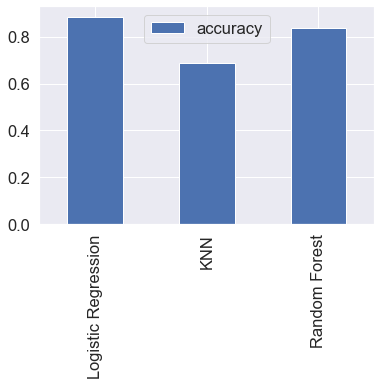

In [106]:
model_compare.T.plot.bar();

### RandomizedSearchCV

In [107]:
# LogisticRegression
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [108]:
# RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

### GridSearchCV

In [110]:
# LogisticRegression
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [111]:
# RandomForestClassifier
gs_rf.score(X_test, y_test)

0.8688524590163934

### Cross validation beyond accuracy

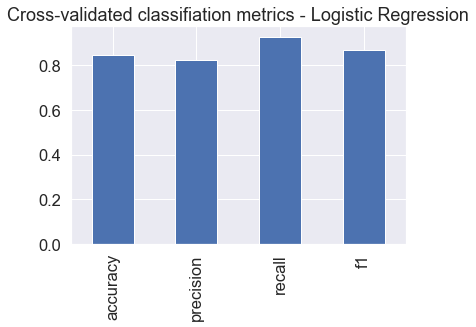

In [112]:
make_plot_cv_metrics(log_reg_cv_scorings, "Logistic Regression")

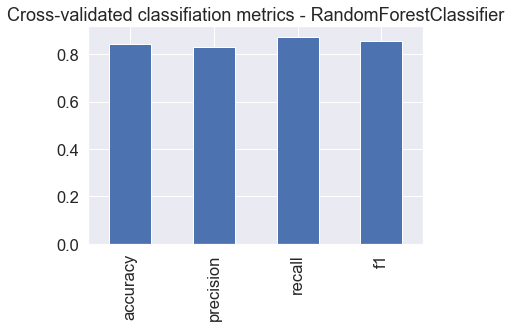

In [113]:
make_plot_cv_metrics(rf_cv_scoring, "RandomForestClassifier")

### Final Result :
* KNN - sorted out
* LogisticRegression - Best result, but no improvement after tuning
* RandomForestClassifier - Could be improved by ~3% after tuning, but still below LogisticRegression